# Forecasting Retail Sales of 45 Stores Using Time Series Model 




## Table of Contents

**1. Introduction**

**2. Data**
1.     Data source

2.     Data description

3.     Key Variable Definitions

4.     Data Analysis

5.     Data Visualization

**3. Forecast Model**
1.     General forecast model for all stores
2.     Specific forecast model for the top store

**4. Conclusion**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Introduction

Revenue plays an important role in retail companies. Currently, with the high growth rate of online sales, forecasting sales becomes a key issue for retail companies, which allows them to properly make short term planning such as managing commodity classification, controlling stock quantity and so on. 

This paper builds AR(p) model with linear regression to quantify influence of temperature, holiday and other indicators on sales, and predict weekly sales. First, we build a general model using average sales data for all stores. Based on that, we then select the best performing store and build a new forecast model for it.

By establishing models, we are able to give some suggestions for the company to predict sales and make short term plans such as managing commodity classification, controlling stock quantity and so on.

# 2. Data

## 1. Data source

### *Data Source: Features data set.csv; sales data-set.csv; stores data-set.csv*
### https://www.kaggle.com/manjeetsingh/retaildataset

## 2. Data description

The dataset provides us with historical sales data for 45 stores attached to one company and located in different regions - each store contains a number of departments. 

During some special holidays such as Thanksgiving, Black Friday and Christmas Day, the company’s sales in that week would increase dramatically, so we introduce IsHoliday dummy variable to explain the  holiday effects.

The company also runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas.

There are three csv documents, Stores, Features and Sales. **Stores** contains anonymized information about the 45 stores, indicating the type and size of store; **Features** contains additional data related to the store, department, and regional activity for the given dates; **Sales** includes historical weekly sales data, which covers to 2010-02-05 to 2012-11-01.

Our objects are as follows:
    
1. Help company distinguish the best performing types of stores in terms of sales, which allows them to adjust their plans accordingly.
2. Model the effects of markdowns, temperature and other indicators on weekly sales
3. Build forecast models for stores, based on which they are able to predict sales in the future.

In [2]:
features=pd.read_csv('Features data set.csv')
sales=pd.read_csv('sales data-set.csv')
stores=pd.read_csv('stores data-set.csv')

In [3]:
features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2/5/10,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2/12/10,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2/19/10,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2/26/10,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,3/5/10,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,6/28/13,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,7/5/13,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,7/12/13,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,7/19/13,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [4]:
sales

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,02/05/2010,24924.50,False
1,1,1,02/12/2010,46039.49,True
2,1,1,02/19/2010,41595.55,False
3,1,1,02/26/2010,19403.54,False
4,1,1,03/05/2010,21827.90,False
...,...,...,...,...,...
421565,45,98,09/28/2012,508.37,False
421566,45,98,10/05/2012,628.10,False
421567,45,98,10/12/2012,1061.02,False
421568,45,98,10/19/2012,760.01,False


In [5]:
stores

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


## 3. Key Variable Definitions

**MarkDown1-5:** Anonymized data related to promotional markdowns. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA.

**IsHoliday:** Dummy variable, whether the week is a special holiday week.

**Store:** The store number

**Dept:** The department number

## 4. Data Analysis

In [6]:
features['Date'] = pd.to_datetime(features['Date'])
sales['Date'] = pd.to_datetime(sales['Date'])
features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


#### Merge three tabs in a unique DataFrame.

In [7]:
df=pd.merge(sales,features, on=['Store','Date', 'IsHoliday'], how='left')
df=pd.merge(df,stores, on=['Store'], how='left')
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,B,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,B,118221


#### Replace NaN with 0.

In [8]:
df.isna().sum() 

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

There are a lot of missing values for MarkDown 1-5. Because markdown data is almost only available after Nov 2011 for each store.

In [9]:
df=df.fillna(0)

#### Transfer *'type'* value from letters A, B, C to numbers 0, 1, 2 respectively
#### Transfer *'IsHoliday'* value from True, False to numbers 1, 0 respectively

In [10]:
# transfer 'type' and  'IsHoliday' to a series of numbers
types_encoded, types =df['Type'].factorize()
df['Type'] = types_encoded

types_encoded, IsHoliday =df['IsHoliday'].factorize()
df['IsHoliday'] = types_encoded

df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315
1,1,1,2010-02-12,46039.49,1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,0,151315
2,1,1,2010-02-19,41595.55,0,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,0,151315
3,1,1,2010-02-26,19403.54,0,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,0,151315
4,1,1,2010-03-05,21827.90,0,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,0,151315


#### Check if the DataFrame has duplicated rows.

In [11]:
print('Duplicated Data:{}'.format(df.duplicated().sum()))

Duplicated Data:0


The result shows that there is no duplicated data.

#### Data description

In [12]:
df.describe()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,0.070358,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,0.589912,136727.915739
std,12.785297,30.492054,22711.183519,0.255750,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,0.666337,60980.583328
min,1.000000,1.000000,-4988.940000,0.000000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,0.000000,34875.000000
25%,11.000000,18.000000,2079.650000,0.000000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,0.000000,93638.000000
50%,22.000000,37.000000,7612.030000,0.000000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,0.000000,140167.000000
75%,33.000000,74.000000,20205.852500,0.000000,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,1.000000,202505.000000
max,45.000000,99.000000,693099.360000,1.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,2.000000,219622.000000


## 5. Data Visualization

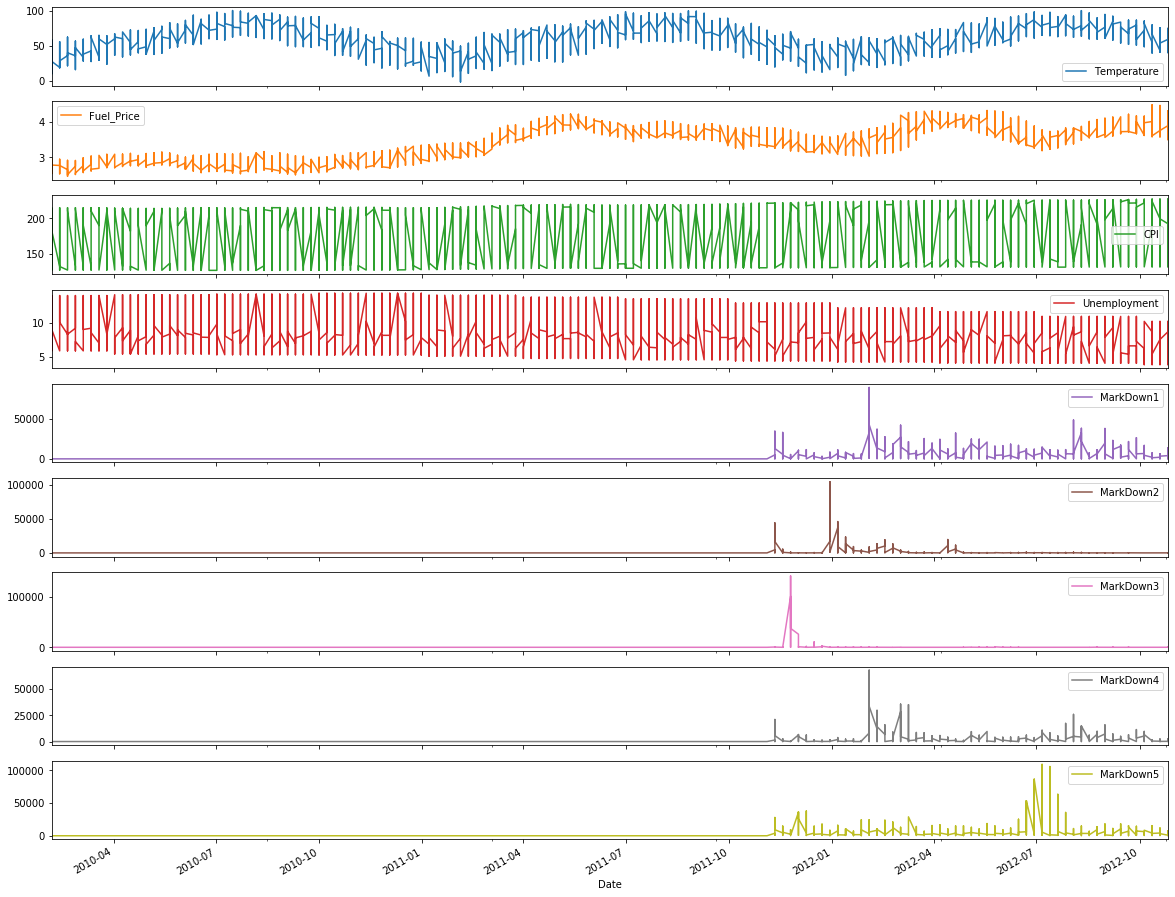

In [13]:
df[['Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 
    'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].plot(x='Date', subplots=True, figsize=(20,17))
plt.show()

#### Here we average 45 stores' sale and rank mean weekly_sales by date.

In [14]:
df_average_sales_week = df.groupby(by=['Date'], as_index=False)['Weekly_Sales'].mean()
df_average_sales = df_average_sales_week.sort_values('Weekly_Sales', ascending=False)
df_average_sales

,Date,Weekly_Sales
46,2010-12-24,27378.692693
98,2011-12-23,25437.146122
42,2010-11-26,22403.336705
94,2011-11-25,22043.563476
45,2010-12-17,20892.463619
...,...,...
50,2011-01-21,13932.367385
49,2011-01-14,13891.283484
47,2010-12-31,13738.538566
51,2011-01-28,13566.239462


In [15]:
tsish = df.groupby(by=['Date'], as_index=False)['IsHoliday'].mean()
tsish

,Date,IsHoliday
0,2010-02-05,0
1,2010-02-12,1
2,2010-02-19,0
3,2010-02-26,0
4,2010-03-05,0
...,...,...
138,2012-09-28,0
139,2012-10-05,0
140,2012-10-12,0
141,2012-10-19,0


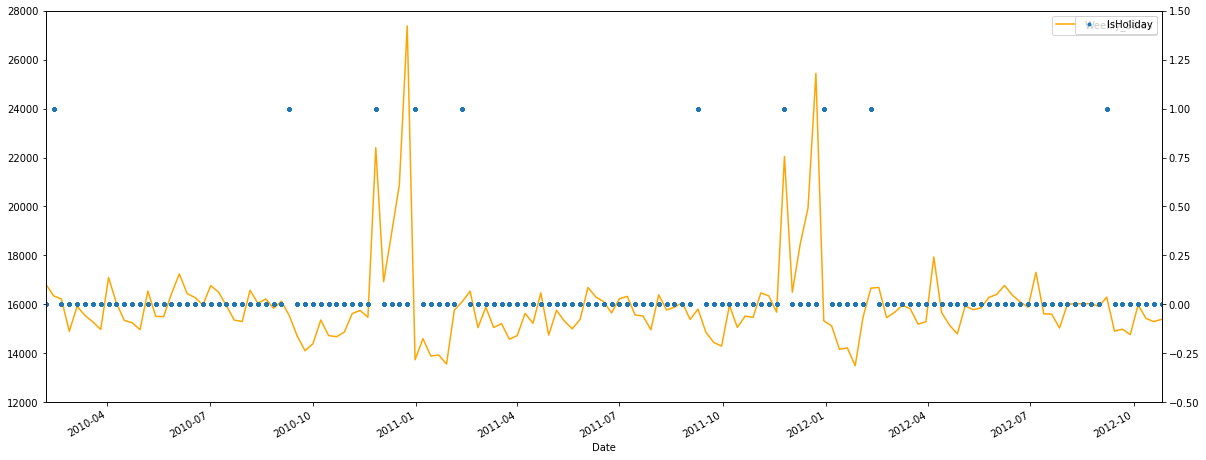

In [16]:
fig,ax1=plt.subplots(figsize=(20,8))
ax2=ax1.twinx()
df_average_sales.plot(x='Date',ax=ax1,ylim=(12000,28000), c='orange')
df.plot('Date','IsHoliday',ax=ax2,ylim=(-0.5,1.5),style='.')

By comparing holidays time with the high sales periods, we are able to assume that these spikes of sales are probably due to the those big special festivals.

#### Top performing type of stores in term of sales

Text(0, 0.5, 'Total weekly sales')

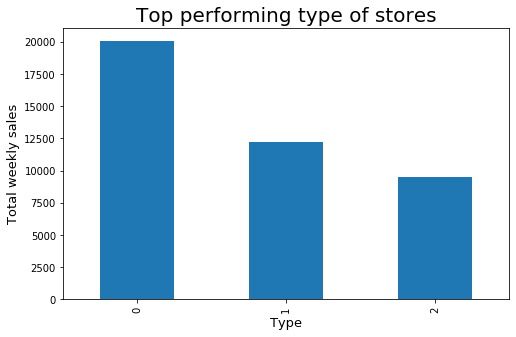

In [17]:
df_top_stores = df.groupby(by=['Type'], as_index=False)['Weekly_Sales'].mean().sort_values('Weekly_Sales',ascending=False)
fig,ax = plt.subplots()
df_top_stores['Weekly_Sales'].plot.bar(figsize=(8,5))
ax.set_title('Top performing type of stores',size=20)
ax.set_xlabel('Type',size=13)
ax.set_ylabel('Total weekly sales',size=13)

#### Top performing stores in term of sales

Text(0, 0.5, 'Total weekly sales')

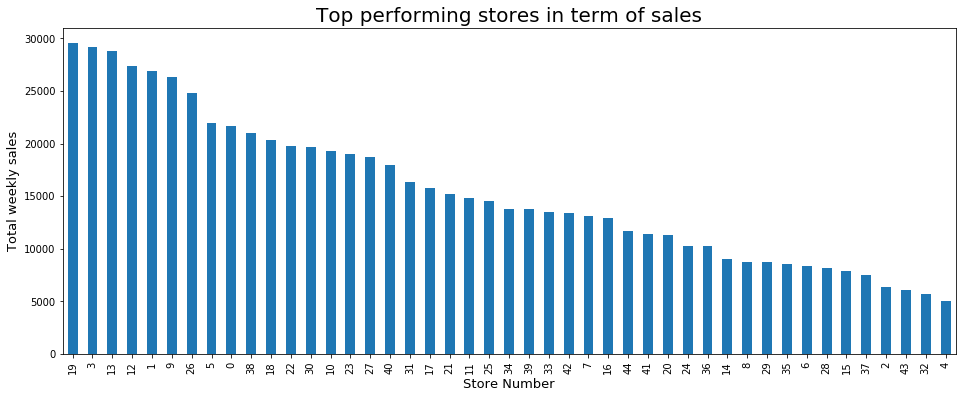

In [18]:
df_top_stores = df.groupby(by=['Store'], as_index=False)['Weekly_Sales'].mean().sort_values('Weekly_Sales',ascending=False)
fig,ax = plt.subplots()
df_top_stores['Weekly_Sales'].plot.bar(figsize=(16,6))
ax.set_title('Top performing stores in term of sales',size=20)
ax.set_xlabel('Store Number',size=13)
ax.set_ylabel('Total weekly sales',size=13)

From plot, we are able to see that the top 3 performing stores are No.19, No.3 and No.13

# 3. Forecast Model

## 1. General forecast model for all stores

In [19]:
ts = df_average_sales_week.set_index('Date')

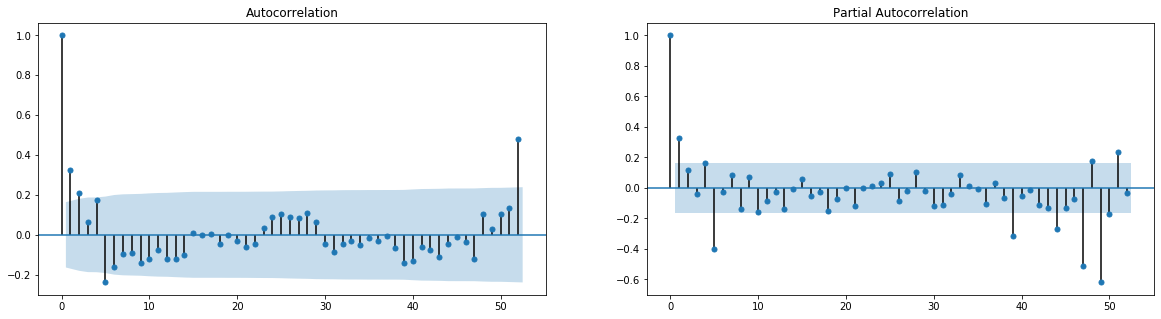

In [20]:
from statsmodels.graphics.tsaplots import acf, pacf, plot_acf, plot_pacf

fig, axes = plt.subplots(1,2,figsize=(20,5))
plot_acf(ts, lags=52, ax=axes[0])
plot_pacf(ts, lags=52, ax=axes[1])
plt.show()

To forecast the mean sales of stores with AR model, we analyze the correlation between current week and lagged weeks by PACF. Therefore, we our model contains lagged variables 1, 5, 39, 44, 47, 49 and 51 weeks, which are out of the confidence interval.

In [21]:
from sklearn.linear_model import LinearRegression

def fit_ar_model(ts, orders):
    
    X=np.array([ ts.values[(i-orders)].squeeze() if i >= np.max(orders) else np.array(len(orders) * [np.nan]) for i in range(len(ts))])
    
    mask = ~np.isnan(X[:,:1]).squeeze()
    
    Y= ts.values
    
    lin_reg=LinearRegression()
    
    lin_reg.fit(X[mask],Y[mask])
    
    print(lin_reg.coef_, lin_reg.intercept_)

    print('Score factor: %.2f' % lin_reg.score(X[mask],Y[mask]))
    
    return lin_reg.coef_, lin_reg.intercept_

def predict_ar_model(ts, orders, coef, intercept):
    return np.array([np.sum(np.dot(coef, ts.values[(i-orders)].squeeze())) + intercept  if i >= np.max(orders) else np.nan for i in range(len(ts))])

[[ 0.28047243 -0.23258453 -0.10810286 -0.07217166 -0.19948972 -0.03426537
   0.17240587]] [19031.76542506]
Score factor: 0.30


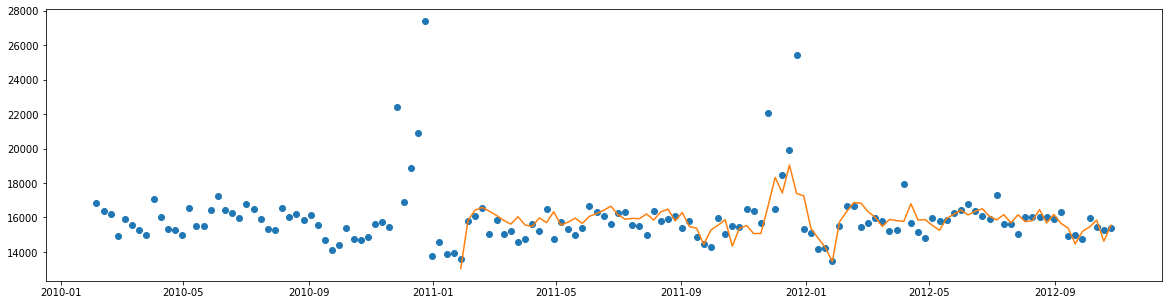

In [22]:
orders=np.array([1,5,39,44,47,49,51])
coef, intercept = fit_ar_model(ts,orders)
pred=pd.DataFrame(index=ts.index, data=predict_ar_model(ts, orders, coef, intercept))
plt.figure(figsize=(20,5))
plt.plot(ts, 'o')
plt.plot(pred)
plt.show()

AR Residuals: avg -0.00, std 0.06


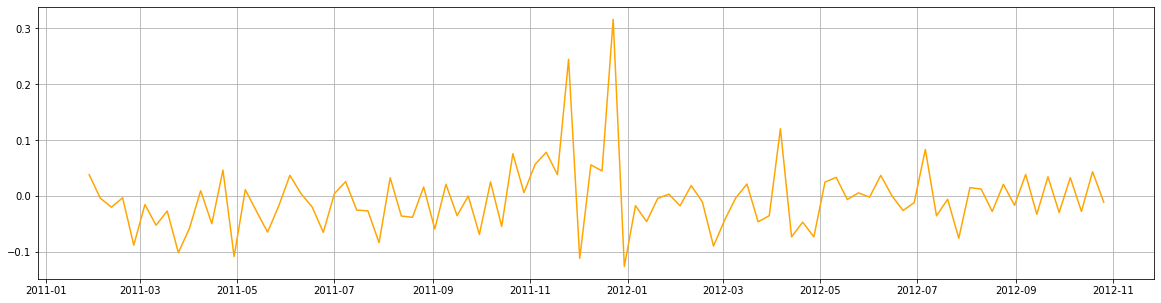

In [23]:
diff=(ts['Weekly_Sales']-pred[0])/ts['Weekly_Sales']

print('AR Residuals: avg %.2f, std %.2f' % (diff.mean(), diff.std()))
 
plt.figure(figsize=(20,5))
plt.plot(diff, c='orange')
plt.grid()
plt.show()

#### Adding variable 'IsHoliday' to the AR model for a better prediction as it may relate the sales volume. 

In [24]:
def fit_ar_model_ish(ts, orders,ish):
    
    X=np.array([ ts.values[(i-orders)].squeeze() if i >= np.max(orders) else np.array(len(orders) * [np.nan]) for i in range(len(ts))])
    
    X = np.append(X, ish.values, axis=1)
    
    mask = ~np.isnan(X[:,:1]).squeeze()
    
    Y= ts.values
    
    lin_reg=LinearRegression()
    
    lin_reg.fit(X[mask],Y[mask])
    
    print(lin_reg.coef_, lin_reg.intercept_)

    print('Score factor: %.2f' % lin_reg.score(X[mask],Y[mask]))
    
    return lin_reg.coef_, lin_reg.intercept_

def predict_ar_model_ish(ts, orders, ish, coef, intercept):

    X=np.array([ ts.values[(i-orders)].squeeze() if i >= np.max(orders) else np.array(len(orders) * [np.nan]) for i in range(len(ts))])
    
    X = np.append(X, ish.values, axis=1)
    
    return np.array( np.dot(X, coef.T) + intercept)

[[ 9.92746750e-02 -1.68669121e-02 -2.32465589e-03  2.47444589e-03
   2.16226339e-02 -1.48915731e-02 -4.16309545e-02  7.86631585e-01
   4.24685509e+02]] [2642.14666327]
Score factor: 0.88


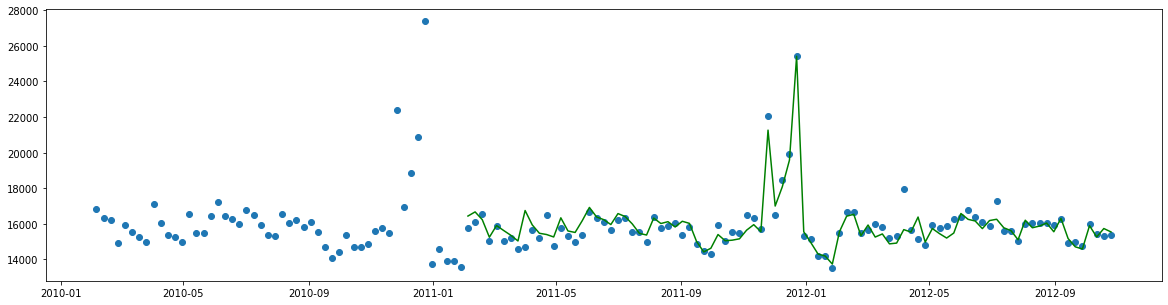

In [25]:
tsishe=tsish[['IsHoliday']]

orders=np.array([1, 5, 39, 44, 47, 49, 51, 52])
coef, intercept = fit_ar_model_ish(ts,orders,tsishe)
pred_ish=pd.DataFrame(index=ts.index, data=predict_ar_model_ish(ts, orders, tsishe, coef, intercept))
plt.figure(figsize=(20,5))
plt.plot(ts, 'o')
plt.plot(pred_ish, c='green')
plt.show()

AR Residuals: avg -0.00, std 0.06
AR wiht IsHoliday Residuals: avg -0.00, std 0.03


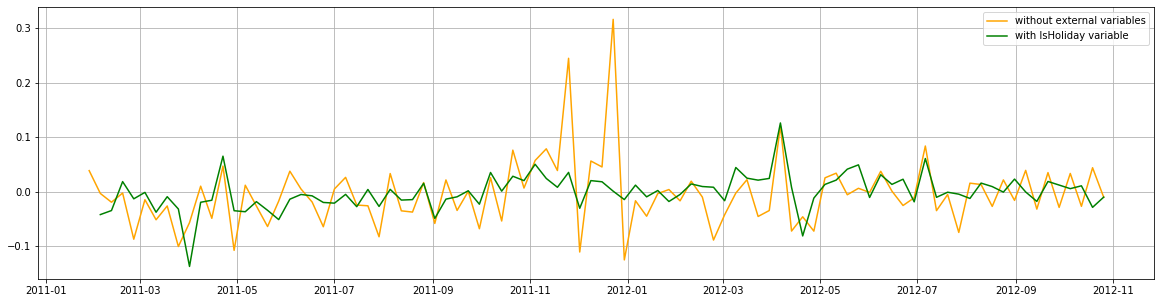

In [26]:
diff=(ts['Weekly_Sales']-pred[0])/ts['Weekly_Sales']
diff_ish=(ts['Weekly_Sales']-pred_ish[0])/ts['Weekly_Sales']
print('AR Residuals: avg %.2f, std %.2f' % (diff.mean(), diff.std()))
print('AR wiht IsHoliday Residuals: avg %.2f, std %.2f' % (diff_ish.mean(), diff_ish.std()))

plt.figure(figsize=(20,5))
plt.plot(diff, c='orange', label='without external variables')
plt.plot(diff_ish, c='green', label='with IsHoliday variable')
plt.legend()
plt.grid()
plt.show()


The coefficents of the dummy variable IsHoliday in the 2nd AR model is 4.247e^02, showing that stores tend to have a great higher sales volume in holiday weeks. However, the coefficients of the lagged variables sharply drop in this model, indicating that 'IsHoliday' has larger influence on average and total sales volume than sales history of the stores. 

Moreover, by comparing the goodness-of-fitness between models w/ and w/o 'IsHoliday', we can see that IsHoiday greatly improves the degree of fitting and IsHoliday is significantly positively correlated to the value of sales of the stores. 

## 2. Specific forecast model for the top store

From the calculation of top saling stores above, we know that the store with highest sales is No.19.

In [27]:
df19 = df.loc[df['Store']==19,:]
df19 

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
177187,19,1,2010-02-05,21500.58,0,20.96,2.954,0.00,0.00,0.00,0.00,0.00,131.527903,8.350,0,203819
177188,19,1,2010-02-12,40188.68,1,23.22,2.940,0.00,0.00,0.00,0.00,0.00,131.586613,8.350,0,203819
177189,19,1,2010-02-19,32365.74,0,28.57,2.909,0.00,0.00,0.00,0.00,0.00,131.637000,8.350,0,203819
177190,19,1,2010-02-26,15770.97,0,30.33,2.910,0.00,0.00,0.00,0.00,0.00,131.686000,8.350,0,203819
177191,19,1,2010-03-05,18293.70,0,32.92,2.919,0.00,0.00,0.00,0.00,0.00,131.735000,8.350,0,203819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187330,19,99,2012-09-07,0.06,1,72.20,4.076,9053.47,27.41,22.94,1677.12,4844.18,138.472936,8.193,0,203819
187331,19,99,2012-09-14,0.04,0,65.08,4.088,13667.97,0.00,13.57,1166.93,7136.43,138.567300,8.193,0,203819
187332,19,99,2012-09-21,29.88,0,60.62,4.203,11030.97,147.55,13.50,1516.01,9152.78,138.653400,8.193,0,203819
187333,19,99,2012-10-05,870.00,0,59.86,4.151,6971.59,0.00,10.96,3640.93,3827.33,138.825600,7.992,0,203819


In [28]:
df19 = df19.groupby('Date',as_index=True).agg({'Weekly_Sales':'mean'})
df19

,Weekly_Sales
Date,
2010-02-05,20939.405139
2010-02-12,21340.971528
2010-02-19,20213.014800
2010-02-26,19618.143714
2010-03-05,21068.233380
...,...
2012-09-28,19118.557429
2012-10-05,19555.779167
2012-10-12,19053.654930


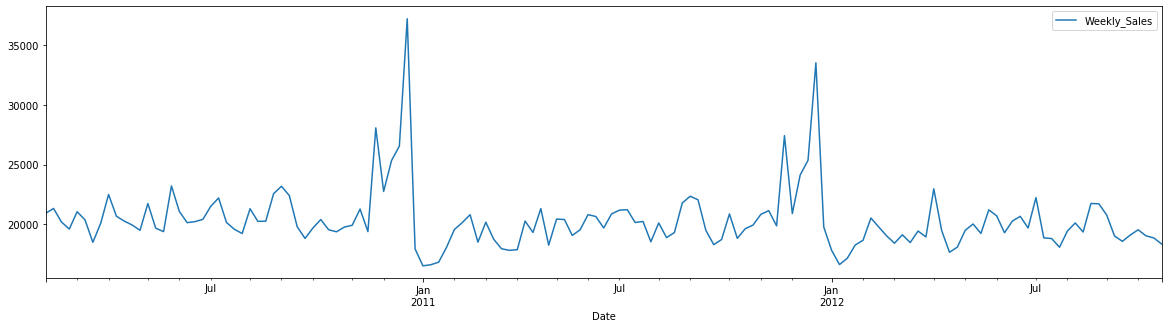

In [29]:
df19.plot(figsize=(20,5))

In [30]:
from statsmodels.graphics.tsaplots import acf, pacf, plot_acf, plot_pacf

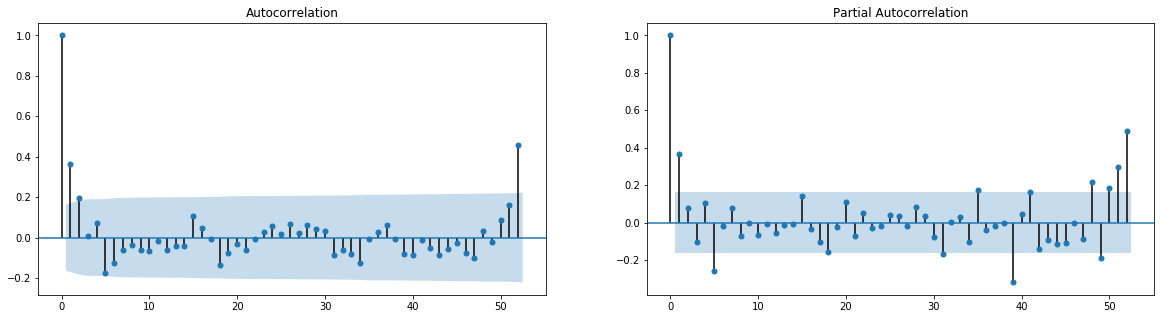

In [31]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
plot_acf(df19.values, lags=52, alpha=0.05, ax=axes[0])
plot_pacf(df19.values, lags=52, alpha=0.05, ax=axes[1])
plt.show()

This particular store shows additional seasonalities from week 48, 50 and 52, which will be included in the AR model.

[[ 0.13400216  0.00421571 -0.0080964   0.06968813 -0.07535149  0.04919529
   0.00323757  0.70823713]] [1972.34986697]
Score factor: 0.80


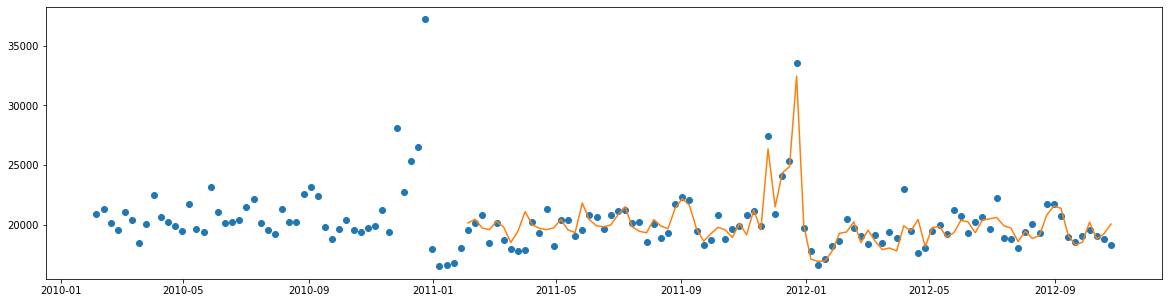

In [32]:
orders=np.array([1, 5, 39, 48, 49, 50, 51, 52])
coef, intercept = fit_ar_model(df19,orders)
pred=pd.DataFrame(index=df19.index, 
                  data=predict_ar_model(df19, orders, coef, intercept))
plt.figure(figsize=(20,5))
plt.plot(df19, 'o')
plt.plot(pred)
plt.show()

AR Residuals: avg -0.00, std 0.05


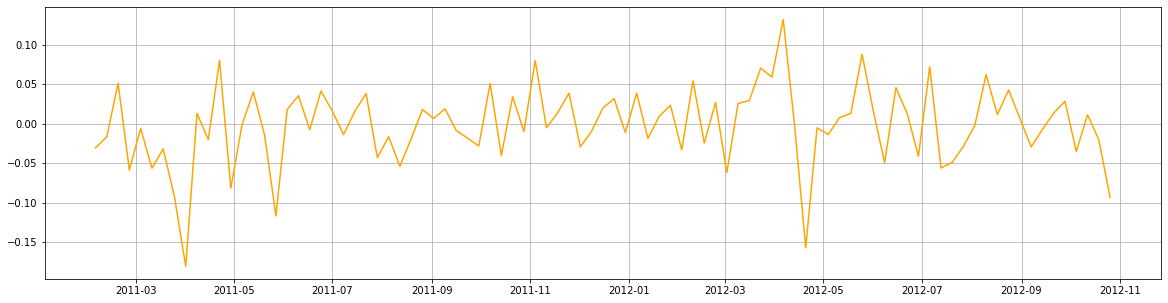

In [33]:
diff=(df19['Weekly_Sales']-pred[0])/df19['Weekly_Sales']

print('AR Residuals: avg %.2f, std %.2f' % (diff.mean(), diff.std()))
 
plt.figure(figsize=(20,5))
plt.plot(diff, c='orange')
plt.grid()
plt.show()

#### Look for predictive power from external variables

In [34]:
dfext = df.loc[df['Store']==19,:]
dfext = dfext.groupby(by=['Date'], as_index=True)[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday',
                                                  'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].mean()
dfext

,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
Date,,,,,,,,,,
2010-02-05,20.96,2.954,131.527903,8.350,0,0.00,0.00,0.00,0.00,0.00
2010-02-12,23.22,2.940,131.586613,8.350,1,0.00,0.00,0.00,0.00,0.00
2010-02-19,28.57,2.909,131.637000,8.350,0,0.00,0.00,0.00,0.00,0.00
2010-02-26,30.33,2.910,131.686000,8.350,0,0.00,0.00,0.00,0.00,0.00
2010-03-05,32.92,2.919,131.735000,8.350,0,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
2012-09-28,56.81,4.158,138.739500,8.193,0,2992.04,48.46,0.00,2463.88,3732.36
2012-10-05,59.86,4.151,138.825600,7.992,0,6971.59,0.00,10.96,3640.93,3827.33
2012-10-12,48.29,4.186,138.911700,7.992,0,2374.50,0.00,7.25,919.32,6101.00


In [35]:
dfext.describe()

,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,52.295035,3.578294,135.092607,7.996252,0.069930,3744.799720,1324.178392,740.733287,1721.520839,1851.244615
std,16.611261,0.454128,2.378864,0.193968,0.255926,7331.242555,5383.878524,7458.371836,5617.433356,3512.871369
min,20.660000,2.837000,131.527903,7.658000,0.000000,0.000000,-265.760000,0.000000,0.000000,0.000000
25%,39.065000,3.052000,132.756559,7.806000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,53.440000,3.722000,135.083733,8.067000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,67.985000,3.975500,137.299707,8.150000,0.000000,6122.550000,112.235000,12.500000,1486.985000,2911.600000
max,79.370000,4.211000,138.911700,8.350000,1.000000,51879.660000,50438.170000,88805.580000,52739.020000,28279.830000


In [36]:
dfext['shifted_sales'] = df19.shift(-1)
dfext

,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,shifted_sales
Date,,,,,,,,,,,
2010-02-05,20.96,2.954,131.527903,8.350,0,0.00,0.00,0.00,0.00,0.00,21340.971528
2010-02-12,23.22,2.940,131.586613,8.350,1,0.00,0.00,0.00,0.00,0.00,20213.014800
2010-02-19,28.57,2.909,131.637000,8.350,0,0.00,0.00,0.00,0.00,0.00,19618.143714
2010-02-26,30.33,2.910,131.686000,8.350,0,0.00,0.00,0.00,0.00,0.00,21068.233380
2010-03-05,32.92,2.919,131.735000,8.350,0,0.00,0.00,0.00,0.00,0.00,20387.350000
...,...,...,...,...,...,...,...,...,...,...,...
2012-09-28,56.81,4.158,138.739500,8.193,0,2992.04,48.46,0.00,2463.88,3732.36,19555.779167
2012-10-05,59.86,4.151,138.825600,7.992,0,6971.59,0.00,10.96,3640.93,3827.33,19053.654930
2012-10-12,48.29,4.186,138.911700,7.992,0,2374.50,0.00,7.25,919.32,6101.00,18872.890714


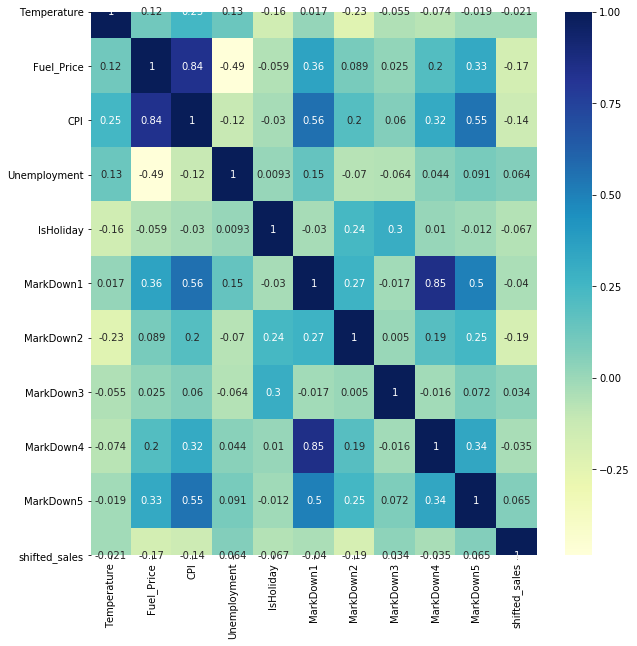

In [37]:
import seaborn as sns
corr = dfext.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap="YlGnBu",
            annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

In [38]:
corr['shifted_sales'].sort_values(ascending=False)

shifted_sales    1.000000
MarkDown5        0.064570
Unemployment     0.063831
MarkDown3        0.034011
Temperature     -0.020678
MarkDown4       -0.034691
MarkDown1       -0.040291
IsHoliday       -0.066735
CPI             -0.139821
Fuel_Price      -0.170241
MarkDown2       -0.185359
Name: shifted_sales, dtype: float64

The external variables available have some correlation with the 1-week lagged sales time series. This means that they have some degree of predictive power at 1 week and can be used to improve our model.

In [39]:
def fit_ar_model_ext(ts, orders, ext, fitter=LinearRegression()):
    
    X=np.array([ ts.values[(i-orders)].squeeze() if i >= np.max(orders) else np.array(len(orders) * [np.nan]) for i in range(len(ts))])
    
    X = np.append(X, ext.values, axis=1)
    
    mask = ~np.isnan(X[:,:1]).squeeze()
    
    Y= ts.values
    
    fitter.fit(X[mask],Y[mask].ravel())
    
    print(fitter.coef_, fitter.intercept_)

    print('Score factor: %.2f' % fitter.score(X[mask],Y[mask]))
    
    return fitter.coef_, fitter.intercept_
    
def predict_ar_model_ext(ts, orders, ext, coef, intercept):

    X=np.array([ ts.values[(i-orders)].squeeze() if i >= np.max(orders) else np.array(len(orders) * [np.nan]) for i in range(len(ts))])
    
    X = np.append(X, ext.values, axis=1)
    
    return np.array( np.dot(X, coef.T) + intercept)

[ 1.23254851e-01 -2.92578328e-02 -1.36205480e-02 -1.21861033e-03
 -9.93198755e-02  4.31202377e-02 -5.50789281e-03  6.57626908e-01
 -1.57478106e+03 -6.52343646e+02  2.48104371e+02  6.50006705e-01
  2.85286847e+02  2.61502873e-02 -1.81384867e-02  2.64724582e-02
 -4.57060184e-02  1.03626229e-02] -12728.320192190546
Score factor: 0.82


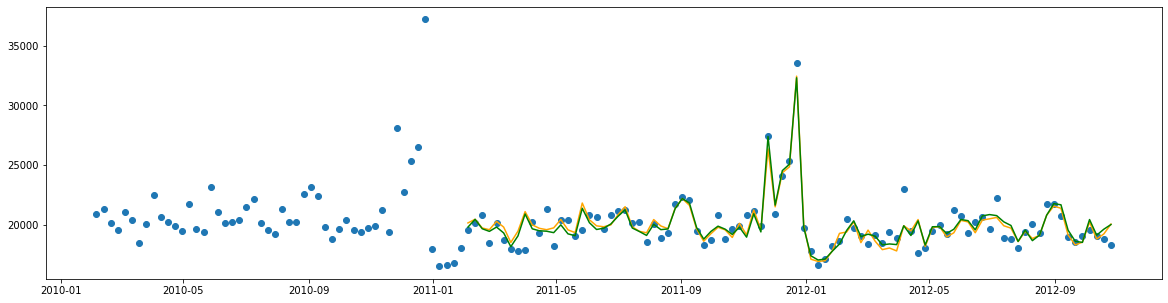

In [40]:
dfexte=dfext[['Unemployment','Fuel_Price','CPI','Temperature', 'IsHoliday',
              'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']]

orders=np.array([1, 5, 39, 48, 49, 50, 51, 52])
coef, intercept = fit_ar_model_ext(df19,orders,dfexte)
pred_ext=pd.DataFrame(index=df19.index, data=predict_ar_model_ext(df19, orders, dfexte, coef, intercept))
plt.figure(figsize=(20,5))
plt.plot(df19, 'o')
plt.plot(pred, c='orange')
plt.plot(pred_ext, c='green')
plt.show()

AR Residuals: avg -0.00, std 0.05
AR wiht Ext Residuals: avg -0.00, std 0.05


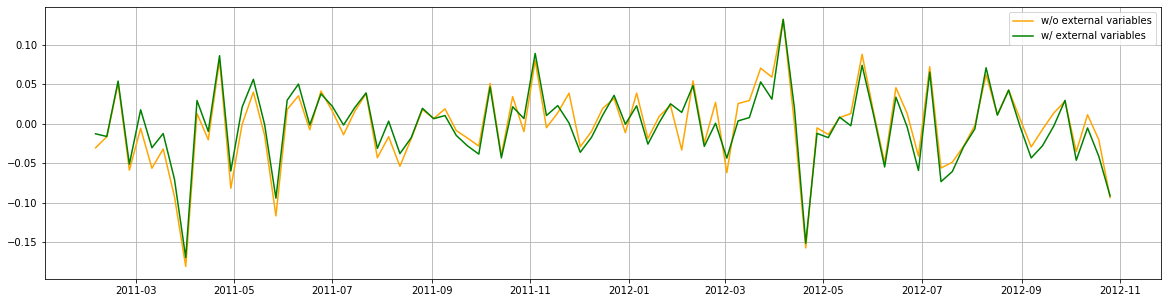

In [41]:
diff=(df19['Weekly_Sales']-pred[0])/df19['Weekly_Sales']
diff_ext=(df19['Weekly_Sales']-pred_ext[0])/df19['Weekly_Sales']

print('AR Residuals: avg %.2f, std %.2f' % (diff.mean(), diff.std()))
print('AR wiht Ext Residuals: avg %.2f, std %.2f' % (diff_ext.mean(), diff_ext.std()))
 
plt.figure(figsize=(20,5))
plt.plot(diff, c='orange', label='w/o external variables')
plt.plot(diff_ext, c='green', label='w/ external variables')
plt.legend()
plt.grid()
plt.show()

As adding external variables does not bring much extra benefits to the prediction, we can infer that the model only containing lagged variables has predicted the model quite well.

At the same time, the little improvement after adding external variables reveals that current and future sales volume of one specific store is closely related to its past performance in sales. However, in the average sales case, we find out that the correlation is weak. This is mainly because for single store, sales is determined by its own features, which can be seen in past sales.     

# 4. Conclusion

## 1. General Model

Summarizing models above, we can see that the lagged terms of week 1, 5, 39 ,51 or 52 are correlated to its current sales. Therefore, we can partly predict future average sales with sales volume history. At the same time, holidays will greatly stimulate consumption and increase the value of sales. Thus, the incoming holiday arrangements can also help us to forecast future sales in a macroscopic view.

## 2. Specific Model for Store 19

In this model, we can notice that the sales values from last week and one year ago affect the predicted sales most significantly. The reason is that the sales of specific stores is greatly decided by its own features like quality of goods or position and seasonality factors, which is embodied in -1 and -52 weeks. For the external variables, unemployment, fuel price and temperature are negatively correlated to sales volume while CPI and Is Holiday have positive correlation to sale. According to this, we can advise managers of stores to increase inventory when regional CPI raises or holiday is coming in preparation for ascending sales. Similarly, faced with higher unemployment rate or temperature, stores are supposed to cut down on their stock to avoid slow sale and unnecessary loss. Last but not least, as coefficients of dummy variables (0-1) markdowns are small, markdowns have tiny effect on stimulating sales of stores. Hence, markdowns seems not to be an effective method to raise sales volume and managers need to think over other benefits from markdowns before decision making.